In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Easy  
Groupon : Describe Hypothesis Type I and Type II errors are, and the trade-offs between them.  
* 1종 오류(Type I error) : 귀무가설($H_0$)이 '참'인데도 기각하여 오류를 범하는 확률($\alpha$ error)  
* 2종 오류(Type II error) : 귀무가설($H_0$)이 '거짓'임에도 채택하는 오류($\beta$ error)
* 1종 오류와 2종 오류의 Trade-off  : 1종 오류 확률이 증가하면 2종 오류 확률은 감소한다

### Medium  
Akuna : Say you have two random variables X and Y, each with a standard deviation.  
What is the variance of aX + bY for constant a and b?  

use  
$E(aX + bY) = aE(X) + bE(Y)$  
$Var(X) = E(X^2) - [E(X)]^2$  
$Cov(X,Y) = E(XY) - E(X)E(Y)$  
cf. X and Y are independent variables, $Cov(X,Y)$ = 0

$$Var(aX + bY) = E[(aX+bY)^2] - (E[aX +bY])^2$$  
$$ = E[a^2X^2 + 2abXY + b^2Y^2] - (aE(X)+bE(Y))^2$$
$$ = (a^2E(X^2) + 2abE(XY) + b^2E(Y^2)) - (a^2[E(X)]^2 + 2abE(X)E(Y) + b^2[E(Y)]^2)$$
$$ = a^2(E(X^2) - [E(X)]^2) + b^2(E(Y^2) - [E(Y)]^2) +2ab(E(XY) - E(X)E(Y))$$
$$ = a^2Var(X) + b^2Var(Y) + 2abCov(X,Y)$$  

$$cf. Var(aX + bY) = a^2Var(X) + b^2Var(Y) \space when \space X,Y \space independent $$



### Hard  
Uber: Say you are given a random Bernoulli trial generator. How would you generate values from a standard normal distribution?  

By Central Limit Theorem, the mean of a sufficiently large sample of Bernoulli trials follows a normal distribution with mean p and standard error $\sqrt{\frac{p(1-p)}{n}}$.

In [96]:
def gbm(n_years, n_stocks, mu, sigma, steps_per_year, s_0):
    dt = 1/steps_per_year # 1/250 = 0.004
    n_steps = int(n_years*steps_per_year) # 1*250 = 250
    rets_plus_1 = np.random.lognormal(mean=(mu+1)*dt, sigma=(sigma*np.sqrt(dt)), size=(n_steps, n_stocks)) # 연수익률, 표준편차를 일별수익률, 표준편차로 환산해서 , 250X3000 array 형태로 일별 수익률 무작위 추출
    rets_plus_1[0] = 1 # 초기값 1
    prices = s_0*pd.DataFrame(rets_plus_1).cumprod() # 250일 동안 누적 변화율
    return prices

(a) Plot 3000 stocks. Then plot Top 30 stocks with highest ending period price.

In [97]:
n_stocks = 3000
mu = 0.05
sigma = 0.2
steps_per_year = 250
s_0 = 100

In [98]:
n_years = 1
price_1y = gbm(n_years, n_stocks, mu, sigma, steps_per_year, s_0)
price_1y

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,102.232168,100.852790,100.671499,99.269004,101.040819,99.521125,99.319622,100.962705,101.688934,101.013501,...,102.809007,100.846550,101.181637,100.810342,100.156273,99.839602,99.753527,99.214352,99.261633,102.041724
2,102.268324,101.705617,101.656123,98.794137,101.696170,100.097150,100.897504,102.786694,102.666896,101.348130,...,103.504768,102.140431,103.570944,99.616762,100.839101,100.167964,97.664788,100.280470,99.931994,100.998557
3,101.645912,101.509483,100.425227,98.133363,101.120611,99.795022,101.936674,102.840406,102.577494,103.360443,...,103.526623,102.677211,103.093566,101.352522,101.214953,101.626967,98.052303,101.771186,100.775219,99.841623
4,99.373317,101.568300,100.221838,97.273301,102.795975,101.511018,102.181276,102.660844,102.680125,103.796730,...,103.785306,98.264470,102.774690,104.172023,102.134460,104.156890,101.414065,102.051657,101.646393,100.930622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,234.313268,239.057573,274.811801,232.788296,233.690626,403.562179,254.263528,285.750327,275.244066,245.349584,...,435.259881,211.067329,265.597736,322.243917,248.473711,313.546022,275.475904,286.979643,330.614556,177.299628
246,245.950013,236.929479,271.860638,232.313477,236.922384,400.532508,251.635280,287.146187,279.780269,244.536259,...,425.221413,209.483397,266.313095,323.807596,248.061406,316.694552,281.160842,283.618473,329.404800,177.992399
247,251.003486,245.007299,268.446307,237.319239,242.387457,401.127725,254.479290,287.492927,281.986077,248.601916,...,425.551768,209.861477,267.533478,317.481212,249.052948,314.946446,285.444162,283.968358,332.317089,179.760558
248,254.745319,242.182937,267.527309,239.002593,242.742737,402.662587,256.204396,290.868150,287.240302,256.656358,...,418.412910,210.993169,274.628065,322.486942,244.199640,317.515040,289.303715,283.954595,331.164659,181.273674


<AxesSubplot:>

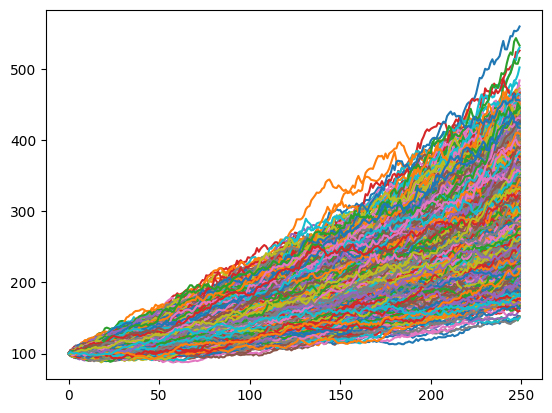

In [99]:
price_1y.plot(legend=False)

<AxesSubplot:>

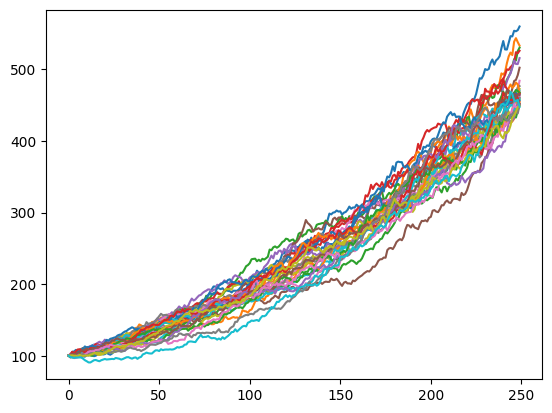

In [100]:
price_1y_30 = price_1y.T.sort_values(249, ascending = False).head(30)
price_1y_30 = price_1y_30.T
price_1y_30.plot(legend=False)

In [101]:
# Calculate the average Sharpe ratio of 3000 stocks
cagr1y = (price_1y.iloc[-1]/price_1y.iloc[0]) - 1
Sharpe1y = cagr1y.mean()/cagr1y.std()
print('Sharpe 3000 stocks(1y) :', round(Sharpe1y,2))
# Calculate the average Sharpe ratio of Top 30 stocks
cagr1y30 = (price_1y_30.iloc[-1] / price_1y_30.iloc[0]) - 1
Sharpe1y30 = cagr1y30.mean()/cagr1y30.std()
print('Sharpe 30 stocks(1y) :', round(Sharpe1y30,2))

Sharpe 3000 stocks(1y) : 3.24
Sharpe 30 stocks(1y) : 12.5


Is it okay to invest money on these 30 stocks? If not, why?
>1. 샤프비율이 높아서 MDD 값도 높을 경우 과적화 일어나 이후 기간에 대해 동일한 결과나 나올 것이라는 보장 없다.
>2. 백테스트 기간이 상대적으로 짧다.
>3. Random 표본을 추출하여 샤프비율을 구하였을 때 7 < Sharpe < 15 범위 까지 나와 안정적인 수익을 기대할 수 없다.

In [102]:
n_years = 5
price_5y = gbm(n_years, n_stocks, mu, sigma, steps_per_year, s_0)
price_5y

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,101.184166,100.399404,100.466595,100.473788,100.711341,100.029582,100.597995,98.608336,100.434525,101.370890,...,99.530086,99.307109,100.290794,101.862963,101.541881,102.026998,100.300225,100.478205,98.996151,99.732968
2,100.627351,102.362374,101.313482,99.029140,102.564973,102.601547,102.955218,98.312761,104.224201,102.108189,...,98.974831,101.190662,99.733520,100.546239,101.637605,104.161661,100.317835,103.402997,98.043479,100.177134
3,100.856670,103.599159,101.069185,100.832938,102.637533,103.377706,102.508167,99.556491,106.490717,99.809454,...,99.872696,101.379031,100.068208,101.234858,103.838210,104.005279,100.612959,103.125045,99.053383,100.265776
4,100.104435,102.777899,101.831225,100.713368,101.797726,103.069105,102.976361,99.815482,111.067534,101.718051,...,99.789851,102.743659,101.520858,99.584441,105.616589,103.994779,99.325831,104.568756,100.236675,101.680290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,10324.772678,30156.027944,12801.703833,25667.180910,12810.493544,19070.679829,12563.097323,25774.478424,37922.441087,32081.115690,...,25321.687621,12599.254045,17163.263213,17651.648519,42938.331373,39786.944605,10869.845164,13088.279738,35538.288389,22503.931010
1246,10321.697815,30453.878377,12738.934194,26089.239966,12643.144679,19388.538516,12593.594505,25966.871987,38838.049376,32683.254696,...,25171.273891,12730.206224,16907.757443,17683.113111,43347.812050,40013.092125,11183.005330,13369.200391,35396.162340,22507.373915
1247,10241.805821,30673.906314,12687.376371,26199.065983,12897.420971,19404.502071,12719.050315,25826.938772,38409.980995,33122.103142,...,25420.339156,12742.491264,17115.370769,17583.563856,43028.260697,39642.575218,11127.519518,13404.821291,35099.902490,22841.883309
1248,10461.322568,30498.574378,12917.169244,25927.578120,12960.592442,19793.794461,12628.979295,25790.409046,38164.262962,32858.220239,...,25693.237590,13005.447722,17121.340293,17566.040448,42924.822008,39329.715276,11159.505163,13707.555984,36073.089702,22685.458553


<AxesSubplot:>

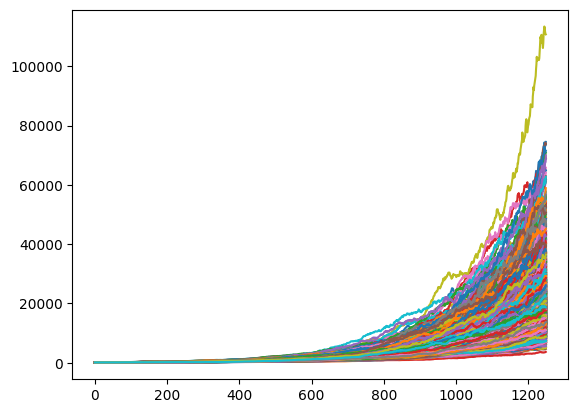

In [103]:
price_5y.plot(legend=False)

<AxesSubplot:>

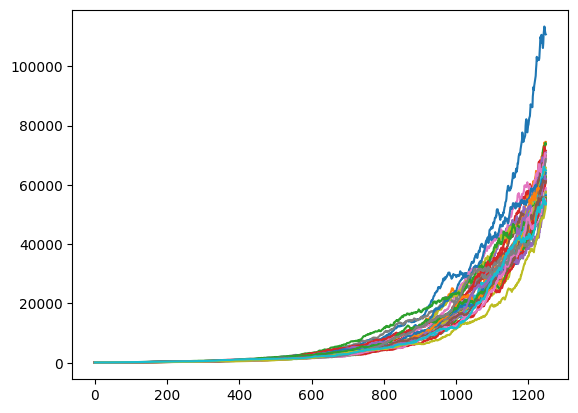

In [104]:
price_5y_30 = price_5y.T.sort_values(1249, ascending = False).head(30)
price_5y_30 = price_5y_30.T
price_5y_30.plot(legend=False)

In [105]:
# Calculate the average Sharpe ratio of 3000 stocks
cagr5y = (price_5y.iloc[-1]/price_5y.iloc[0]) - 1
Sharpe5y = cagr5y.mean()/cagr5y.std()
print('Sharpe 3000 stocks(5y) :', round(Sharpe5y,2))
# Calculate the average Sharpe ratio of Top 30 stocks 
cagr5y30 = (price_5y_30.iloc[-1] /price_5y_30.iloc[0])- 1
Sharpe5y30 = cagr5y30.mean()/cagr5y30.std()
print('Sharpe 30 stocks(5y) :', round(Sharpe5y30,2)) 

Sharpe 3000 stocks(5y) : 2.13
Sharpe 30 stocks(5y) : 5.64


What intuition we can get from these results? Think about the relation with backtesting.
>Random 표본을 추출하여 샤프비율을 구하였을 때 3 < Sharpe < 8 범위 까지 나와 1년 표본을
>사용했을 때 대비 샤프비율의 편차가 적었다.  
>즉 백테스트 했을 때 편차가 적기 때문에 이후 기간에 대해서도 일관성있는 수익률을 기대할 수 있다.